# 2440016804 - Rio Pramana - LA01 - Assignment 7

#### Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
# Importing the dataset, downloaded file is in the same folder
csv_path = "Social_Network_Ads.csv"
ads_df = pd.read_csv(csv_path)

#### Run a quick check on the dataset

In [3]:
ads_df.shape

(400, 3)

In [4]:
ads_df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


The independent variables are all numeric and there's no missing data

In [6]:
ads_df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
#Extracting independent variables:
x = ads_df.iloc[:,:-1].values #Extract semua kolom kecuali kolom terakhir
print(x)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [8]:
#Extracting dependent variable:
y = ads_df.iloc[:,2].values #Extract kolom terakhir
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


#### Splitting training and test data

Before we do feature scaling, we must split our data first

With 400 data, I decided to split the dataset into 3:1 ratio (Training set contains 300 data, Test set contains 100 data)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print('Train set: ', x_train.shape, y_train.shape)
print('Test set: ', x_test.shape, y_test.shape)

Train set:  (300, 2) (300,)
Test set:  (100, 2) (100,)


#### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [11]:
x_train[0:5]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [12]:
x_test[0:5]

array([[-0.54748976,  0.5130727 ],
       [ 0.15442019, -0.61825566],
       [-0.10879604,  0.14615539],
       [-0.54748976,  0.26846116],
       [-0.10879604, -0.61825566]])

## Predicting using K-NN Classifier (Minkowski)

In [13]:
#Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

#### Finding the best number of K's to use for best accuracy

In [14]:
from sklearn import metrics
K = 10 #Finding best number of K's between 1-9 (inclusive)
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfusionMatrix = []
for n in range(1,K):
    #Training the model and predict
    neighb = KNeighborsClassifier(n_neighbors = n, metric = 'minkowski').fit(x_train, y_train) #using Minkowski distance metric
    yhat = neighb.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])
    
mean_acc

array([0.88, 0.88, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93])

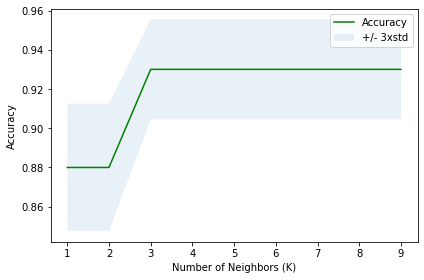

In [15]:
plt.plot(range(1,K), mean_acc, 'g')
plt.fill_between(range(1,K), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.1)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [16]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.93 with k= 3


We found that k = 3 resulted in best accuracy (even though the same thing could be said for k = 4 to k = 9)

So, for the classifier, we'll use K = 3

#### Predict using K-NN Classifier with K = 3

In [17]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')
classifier.fit(x_train, y_train)
classifier

KNeighborsClassifier(n_neighbors=3)

In [18]:
#Predicting
y_pred = classifier.predict(x_test)

## Evaluating accuracy using confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf_mtx = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [20]:
accuracy

0.93

In [21]:
conf_mtx

array([[64,  4],
       [ 3, 29]], dtype=int64)

<AxesSubplot:>

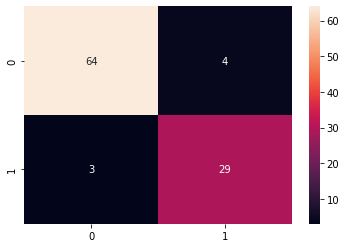

In [22]:
#Visualizing confusion matrix
sns.heatmap(conf_mtx, annot = True)

## Visualizing the Training and Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


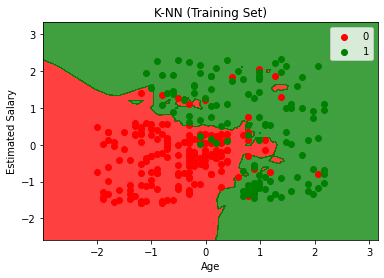

In [23]:
from matplotlib.colors import ListedColormap

x1, x2 = np.meshgrid(np.arange(start = x_train[:, 0].min()-1, stop = x_train[:, 0].max()+1, step = 0.01),
                    np.arange(start = x_train[:, 1].min()-1, stop = x_train[:, 1].max()+1, step = 0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                                alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_train)):
    plt.scatter(x_train[y_train == j, 0], x_train[y_train == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('K-NN (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


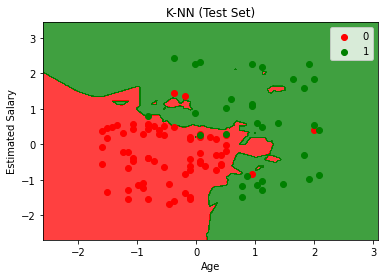

In [24]:
x1, x2 = np.meshgrid(np.arange(start = x_test[:, 0].min()-1, stop = x_test[:, 0].max()+1, step = 0.01),
                    np.arange(start = x_test[:, 1].min()-1, stop = x_test[:, 1].max()+1, step = 0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                                alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_test)):
    plt.scatter(x_test[y_test == j, 0], x_test[y_test == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('K-NN (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.legend()
plt.show()